In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pickle
import clean_data
import random
import train
import json

Loading existing model


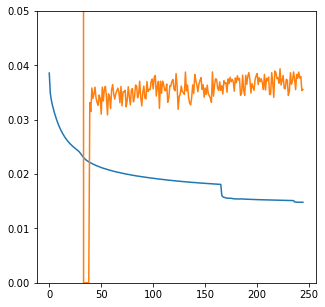

In [2]:
model_id='full_local_10c'

with open(f'data/{model_id}.cfg') as f:
    configurations = json.load(f)
    
# model, _, _, _, mean_losses, _ = train.load_model_with_config(configurations)
model, _, _, mean_losses, _ = train.legacy_load_model_with_config(configurations)
    
tl, vl = zip(*mean_losses)

fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(tl[0:], label='Train')
ax.plot(vl[0:], label='Validation')

ax.set_ylim(0,0.05)
# ax.set_yscale('log')
plt.show()

In [105]:
list(zip(range(1,len(tl)),tl,vl))

[(1, 0.038583882173810896, 0.5863143708131805),
 (2, 0.03486645430561727, 1.6872457574349655),
 (3, 0.03362730462696065, 0.6467058742843971),
 (4, 0.032694872359097654, 0.5790598148294566),
 (5, 0.03194542298846211, 0.5507112505702743),
 (6, 0.0312590227701245, 0.5564188535645975),
 (7, 0.03062811530950814, 0.5313176445129687),
 (8, 0.030047199186888633, 0.5725953974200729),
 (9, 0.02950349893693629, 0.5316704002158771),
 (10, 0.02900547906175876, 0.5502708437717307),
 (11, 0.028550345909865587, 0.5650856541469693),
 (12, 0.02814084163903029, 0.5579118058626459),
 (13, 0.027759419991475333, 0.5822482523643624),
 (14, 0.027418774951639687, 0.5829738167218895),
 (15, 0.027088436187734388, 0.6530273750084317),
 (16, 0.026788640193150796, 0.5357459440742353),
 (17, 0.026516884534799445, 0.6760277135019419),
 (18, 0.026260022631593726, 0.6382749612632506),
 (19, 0.026019883962523405, 0.6625419587662049),
 (20, 0.025795084892823505, 1.207927155022459),
 (21, 0.02558094690740414, 0.8712131401

Loading existing model
Loading existing model
Loading existing model


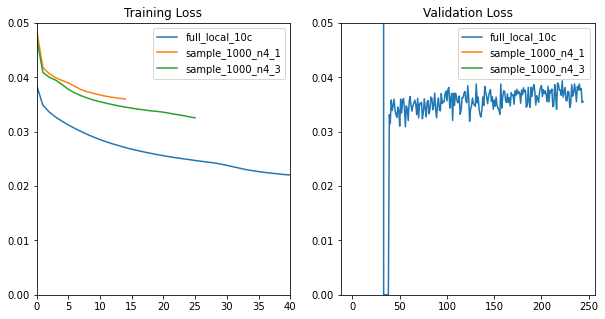

In [3]:
# Comparison of models
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.set_title("Training Loss")
ax2.set_title("Validation Loss")

best = [('full_local_10c', 'n3'), ('sample_1000_n4_1', 'n4'), ('sample_1000_n4_3', 'n4')]

for m,v in best:
    model_id = m
    
    try:
        with open(f'data/{model_id}.cfg') as f:
            configurations = json.load(f)
    except:
        continue

    if v == 'n4':
        model, _, _, _, mean_losses, _ = train.load_model_with_config(configurations)
    else:
        model, _, _, mean_losses, _ = train.legacy_load_model_with_config(configurations)

    tl, vl = zip(*mean_losses)
    ax1.plot(tl, label=model_id)
    ax2.plot(vl, label=model_id)
    
ax1.set_ylim(0,0.05)
ax2.set_ylim(0.0,0.05)
ax1.set_xlim(0,40)
# ax1.set_yscale('log')
ax1.legend()
ax2.legend()
plt.show()

In [15]:

# with open(f'data/full_remote_2b.cfg') as f:
#     configurations = json.load(f)
# configurations

In [16]:
# # Comparison of models
# fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
# ax1.set_title("Training Loss")
# ax2.set_title("Validation Loss")

# best = [3, 7, 10]

# for m in best:
# # for m in range(1,15):
#     model_id = f'full_local_{m}'
    
#     try:
#         with open(f'data/{model_id}.cfg') as f:
#             configurations = json.load(f)
#     except:
#         continue

#     model, _, _, mean_losses, _ = train.load_model_with_config(configurations)

#     tl, vl = zip(*mean_losses)
#     ax1.plot(tl[:20], label=model_id)
#     ax2.plot(vl[:20], label=model_id)
    
# # ax1.set_ylim(0,0.05)
# ax1.set_ylim(0.025,0.027)
# ax2.set_ylim(0.4,1.0)
# ax1.legend()
# ax2.legend()
# plt.show()

In [12]:
# X_train = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_train1.pkl')
# y_train = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_train1.pkl')

# X_train_10839 = X_train[X_train.NORAD_CAT_ID == 10839]
# X_train_10839_idx = X_train_10839.index

# X_test = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_test1.pkl')
# y_test = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_test1.pkl')

# X_test_27944 = X_test[X_test.NORAD_CAT_ID == 27944]
# X_test_27944_idx = X_test_27944.index

# #--------------
# y_train_10839 = y_train.loc[X_train_10839_idx]
# y_test_27944 = y_test.loc[X_test_27944_idx]

# X_train_10839.to_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_train_10839.pkl')
# y_train_10839.to_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_train_10839.pkl')
# X_test_27944.to_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_test_27944.pkl')
# y_test_27944.to_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_test_27944.pkl')

# #----------------
# test_ids = np.random.choice(list(set(X_test.NORAD_CAT_ID.unique())),10)
# X_test_sample = X_test[X_test.NORAD_CAT_ID.isin(test_ids)]
# X_test_sample_idx = X_test_sample.index
# y_test_sample = y_test.loc[X_test_sample_idx]
# X_test_sample.to_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_test_sample.pkl')
# y_test_sample.to_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_test_sample.pkl')


#=======================

X_train_10839 = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_train_10839.pkl')
y_train_10839 = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_train_10839.pkl')
X_test_27944 = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/x_test_27944.pkl')
y_test_27944 = pd.read_pickle(os.environ['GP_HIST_PATH'] + '/cleaned/y_test_27944.pkl')

In [13]:
cols = ['BSTAR', 'INCLINATION', 'RA_OF_ASC_NODE', 'ECCENTRICITY',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION', 'SUNSPOTS_1D',
       'SUNSPOTS_3D', 'SUNSPOTS_7D', 'AIR_MONTH_AVG_TEMP',
       'WATER_MONTH_AVG_TEMP', 'year', 'month_sin', 'month_cos', 'hour_sin',
       'hour_cos', 'minute_sin', 'minute_cos', 'second_sin', 'second_cos',
       'ms_sin', 'ms_cos', 'year_y', 'month_sin_y', 'month_cos_y',
       'hour_sin_y', 'hour_cos_y', 'minute_sin_y', 'minute_cos_y',
       'second_sin_y', 'second_cos_y', 'ms_sin_y', 'ms_cos_y',
       'epoch_day_diff', 'epoch_sec_diff', 'epoch_ms_diff']
graph_cols = ['INCLINATION','RA_OF_ASC_NODE', 'ECCENTRICITY', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'MEAN_MOTION']

In [16]:
y_train_10839.columns[:-1]

Index(['INCLINATION', 'RA_OF_ASC_NODE', 'ECCENTRICITY', 'ARG_OF_PERICENTER',
       'MEAN_ANOMALY', 'MEAN_MOTION'],
      dtype='object')

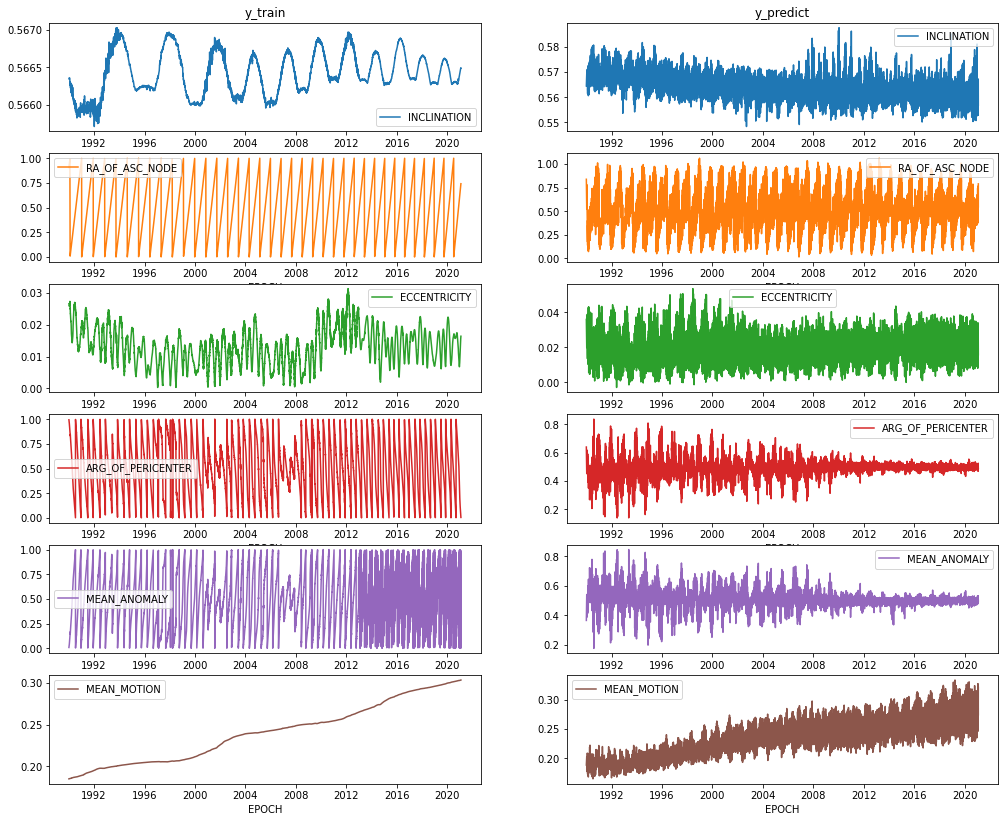

In [44]:
fig, axs = plt.subplots(6,2,figsize=(17,14))

# y_train_10839 = y_train.loc[X_train_10839_idx]
y_train_10839['EPOCH'] = X_train_10839['EPOCH_y']
y_train_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,0])

results = train.predict(model, X_train_10839[cols], y_train_10839[y_train_10839.columns[:-1]], device=configurations['device'])
y_pred_10839 = pd.DataFrame(results, columns=graph_cols)
y_pred_10839['EPOCH'] = X_train_10839['EPOCH_y'].reset_index(drop=True)
y_pred_10839.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,1])

axs[0,0].set_title('y_train')
axs[0,1].set_title('y_predict')
plt.show()

In [23]:
# X_test_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, title='X_test')
# plt.show()

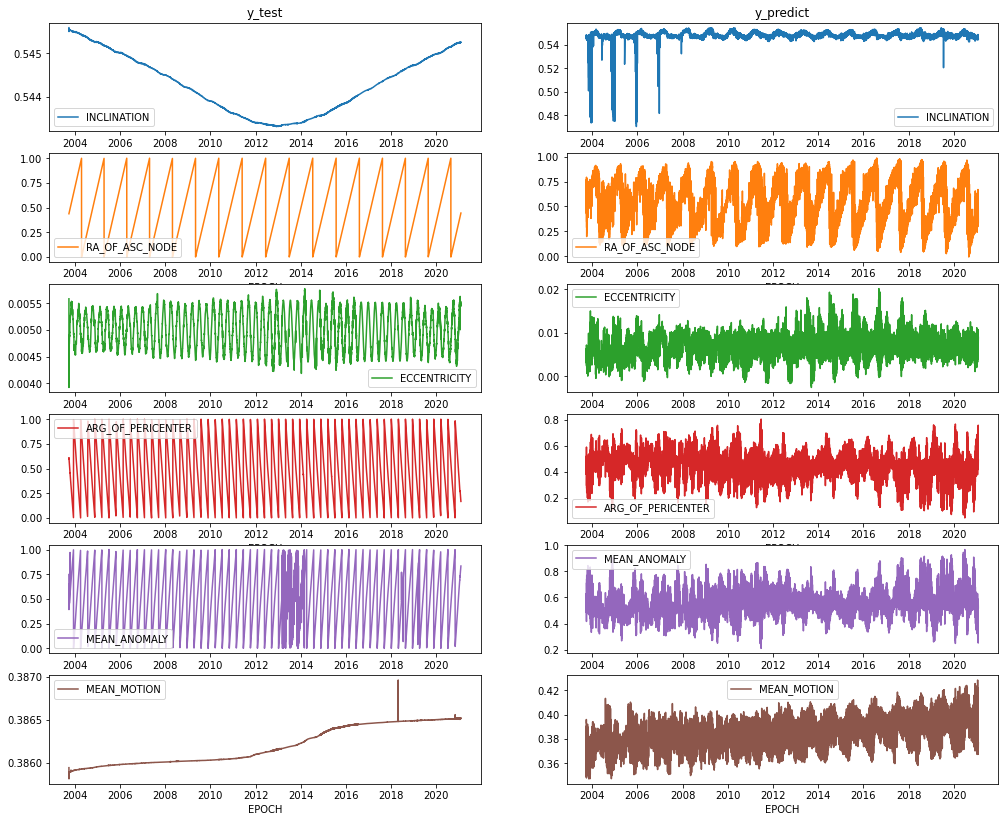

In [45]:
fig, axs = plt.subplots(6,2,figsize=(17,14))

# y_test_27944 = y_test.loc[X_test_27944_idx]
y_test_27944['EPOCH'] = X_test_27944['EPOCH_y']
y_test_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,0])

results = train.predict(model, X_test_27944[cols], y_test_27944[y_train_10839.columns[:-1]], device=configurations['device'])
y_pred_27944 = pd.DataFrame(results, columns=graph_cols)
y_pred_27944['EPOCH'] = X_test_27944['EPOCH_y'].reset_index(drop=True)
y_pred_27944.set_index('EPOCH')[graph_cols].plot(figsize=[14,14], subplots=True, ax=axs[:,1])

axs[0,0].set_title('y_test')
axs[0,1].set_title('y_predict')
plt.show()